   # STOCK PRICE PREDICTION USING MACHINE LEARNING [LSTM]


<img src="sm3.jpg" style ="width:700px; height:350px "/>

# Project Objective :-

###  AIM : To predict the future closing value of a given stock across a given period of time using Machine Learning Technique
                      

## Importing Required Libraries:

Firstly , we are installing the required libraries for our project and importing them in the Jupyter notebook



In [1]:
#Importing the Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

## Collecting Dataset 

In this step we have downloaded the "ITC" companies dataset from Kaggle Website and imported it into our Notebook using Pandas Library

In [2]:
#Converting CSV file into a dataframe

df = pd.read_csv("itc_dataset.csv")

In [3]:
#View of the entire data

df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.00,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.30,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.00,731.00,726.20,732.43,1382149,1.012325e+14,NaN,NaN,NaN
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.00,784.30,784.30,776.63,721618,5.604266e+13,NaN,NaN,NaN
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.00,847.05,847.05,841.25,231209,1.945046e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,ITC,EQ,205.35,205.80,206.75,204.70,205.50,205.30,205.64,19886214,4.089370e+14,103777.0,11449231.0,0.5757
5302,2021-04-27,ITC,EQ,205.30,205.30,206.95,205.05,205.50,205.40,205.85,11444814,2.355887e+14,94890.0,4863874.0,0.4250
5303,2021-04-28,ITC,EQ,205.40,206.00,206.50,205.30,205.65,205.50,205.96,12708021,2.617327e+14,69476.0,7221020.0,0.5682
5304,2021-04-29,ITC,EQ,205.50,207.10,207.55,204.05,204.40,204.30,205.37,13096755,2.689642e+14,95800.0,5887019.0,0.4495


In [4]:
pd.options.mode.chained_assignment = None

## Data Cleaning and Data Discretization 

In this step we are removing the data that is not required for our analysis and checking the integrity of Data

In [5]:
#Dropping Unnecessary columns

df.drop(["Symbol","Prev Close","Series","Last","Turnover","Trades","Deliverable Volume","%Deliverble"],inplace = True , axis = 1)

In [6]:
df

,Date,Open,High,Low,Close,VWAP,Volume
0,2000-01-03,694.00,708.50,675.00,708.50,701.81,562715
1,2000-01-04,714.00,729.00,694.30,712.35,714.16,712637
2,2000-01-05,716.25,758.90,660.00,726.20,732.43,1382149
3,2000-01-06,741.00,784.30,741.00,784.30,776.63,721618
4,2000-01-07,832.40,847.05,824.00,847.05,841.25,231209
...,...,...,...,...,...,...,...
5301,2021-04-26,205.80,206.75,204.70,205.30,205.64,19886214
5302,2021-04-27,205.30,206.95,205.05,205.40,205.85,11444814
5303,2021-04-28,206.00,206.50,205.30,205.50,205.96,12708021
5304,2021-04-29,207.10,207.55,204.05,204.30,205.37,13096755


In [7]:
#Basic Information about Columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5306 non-null   object 
 1   Open    5306 non-null   float64
 2   High    5306 non-null   float64
 3   Low     5306 non-null   float64
 4   Close   5306 non-null   float64
 5   VWAP    5306 non-null   float64
 6   Volume  5306 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 290.3+ KB


In [8]:
#Statistical Information of data

df.describe()

,Open,High,Low,Close,VWAP,Volume
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03
mean,420.631511,426.629061,414.241538,420.273690,420.522927,7.173165e+06
std,328.240059,333.333043,323.333442,328.165405,328.435808,9.613497e+06
min,115.000000,116.200000,114.400000,115.450000,115.390000,6.797000e+03
25%,202.000000,204.500000,198.500000,201.650000,201.705000,1.038020e+06
50%,280.200000,283.000000,277.025000,280.025000,280.055000,5.122630e+06
75%,630.975000,640.000000,623.500000,631.362500,631.727500,8.788539e+06
max,1946.000000,1964.800000,1916.300000,1940.100000,1933.790000,1.494797e+08


In [9]:
#Checking if there are any Null or NA values 

df.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
VWAP      False
Volume    False
dtype: bool

In [10]:
#Creating a copy of the dataframe

dataframe_copy = df.copy()

In [11]:
#Slicing out only required records after the Stocksplit happened 

itc_df = dataframe_copy.loc[4111:5306]

In [12]:
itc_df

,Date,Open,High,Low,Close,VWAP,Volume
4111,2016-07-01,243.30,259.75,242.60,252.35,253.10,27944232
4112,2016-07-04,254.00,254.00,244.00,244.90,246.64,13996866
4113,2016-07-05,245.85,247.00,242.20,243.55,243.88,8989659
4114,2016-07-07,244.50,248.65,243.90,247.00,245.97,8960871
4115,2016-07-08,247.40,247.40,242.50,245.85,244.63,6899736
...,...,...,...,...,...,...,...
5301,2021-04-26,205.80,206.75,204.70,205.30,205.64,19886214
5302,2021-04-27,205.30,206.95,205.05,205.40,205.85,11444814
5303,2021-04-28,206.00,206.50,205.30,205.50,205.96,12708021
5304,2021-04-29,207.10,207.55,204.05,204.30,205.37,13096755


In [13]:
#Resetting the Index to 'Date'

itc_df.set_index(["Date"],inplace = True)

In [14]:
itc_df

,Open,High,Low,Close,VWAP,Volume
Date,,,,,,
2016-07-01,243.30,259.75,242.60,252.35,253.10,27944232
2016-07-04,254.00,254.00,244.00,244.90,246.64,13996866
2016-07-05,245.85,247.00,242.20,243.55,243.88,8989659
2016-07-07,244.50,248.65,243.90,247.00,245.97,8960871
2016-07-08,247.40,247.40,242.50,245.85,244.63,6899736
...,...,...,...,...,...,...
2021-04-26,205.80,206.75,204.70,205.30,205.64,19886214
2021-04-27,205.30,206.95,205.05,205.40,205.85,11444814
2021-04-28,206.00,206.50,205.30,205.50,205.96,12708021


In [15]:
itc_df['Date'] = pd.to_datetime(itc_df.index)


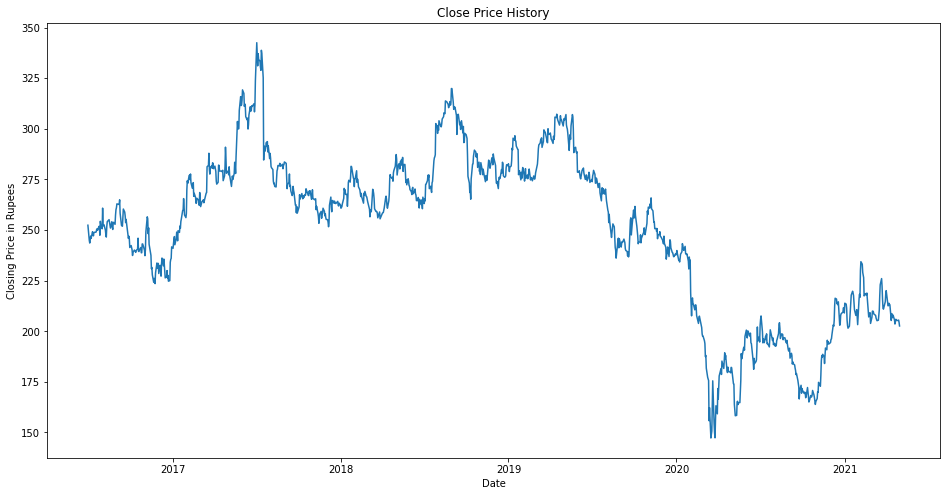

In [16]:
#Plotting Close Price History

plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(itc_df.Date,itc_df.Close)
plt.xlabel("Date")
plt.ylabel("Closing Price in Rupees")
plt.show()

# Feature Selection

In this Project we selected 'Close' price as a feature as we have to predict Closing price of the stock

In [17]:
#Create a new dataframe with only "Close Price"

data = itc_df.filter(["Close"])

In [18]:
data

,Close
Date,
2016-07-01,252.35
2016-07-04,244.90
2016-07-05,243.55
2016-07-07,247.00
2016-07-08,245.85
...,...
2021-04-26,205.30
2021-04-27,205.40
2021-04-28,205.50


In [19]:
#Converting dataframe into numpy array

dataset = data.values

In [20]:
dataset

array([[252.35],
       [244.9 ],
       [243.55],
       ...,
       [205.5 ],
       [204.3 ],
       [202.6 ]])

#  Data Preprocessing

After the dataset is transformed into a clean dataset, the dataset is divided into training and testing sets so as to evaluate.

In [21]:
#Scaling the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [22]:
scaled_data

array([[0.53828425],
       [0.50012804],
       [0.49321383],
       ...,
       [0.29833547],
       [0.2921895 ],
       [0.28348271]])

In [23]:
#Training data split

training_data_len = math.ceil(len(dataset) *.80)

In [24]:
training_data_len

956

In [25]:
#Creating the scaled training data set

train_data = scaled_data[0:training_data_len ,:]
train_data


array([[5.38284251e-01],
       [5.00128041e-01],
       [4.93213828e-01],
       [5.10883483e-01],
       [5.04993598e-01],
       [5.21895006e-01],
       [5.18053777e-01],
       [5.11395647e-01],
       [5.19590269e-01],
       [5.20358515e-01],
       [5.20614597e-01],
       [5.21382843e-01],
       [5.27528809e-01],
       [5.29321383e-01],
       [5.25480154e-01],
       [5.35211268e-01],
       [5.35211268e-01],
       [5.12932138e-01],
       [5.48271447e-01],
       [5.38796415e-01],
       [5.29321383e-01],
       [5.81562100e-01],
       [5.40076825e-01],
       [5.37003841e-01],
       [5.39308579e-01],
       [5.25992318e-01],
       [5.14212548e-01],
       [5.08322663e-01],
       [5.34699104e-01],
       [5.47247119e-01],
       [5.52368758e-01],
       [5.45198464e-01],
       [5.37259923e-01],
       [5.31113956e-01],
       [5.47247119e-01],
       [5.33418694e-01],
       [5.27528809e-01],
       [5.43918054e-01],
       [5.45710627e-01],
       [5.40588988e-01],


In [26]:
len(train_data)

956

In [27]:
#Splitting into x_train and y_train datasets
x_train = []
y_train = []

for i in range(100,len(train_data)):
    x_train.append(train_data[i-100:i ,0])
    y_train.append(train_data[i,0])

In [28]:
#Converting datasets into numpy arrays

x_train , y_train = np.array(x_train),np.array(y_train)

In [29]:
x_train

array([[0.53828425, 0.50012804, 0.49321383, ..., 0.39052497, 0.41766965,
        0.44276569],
       [0.50012804, 0.49321383, 0.51088348, ..., 0.41766965, 0.44276569,
        0.42919334],
       [0.49321383, 0.51088348, 0.5049936 , ..., 0.44276569, 0.42919334,
        0.43661972],
       ...,
       [0.48040973, 0.50140845, 0.49731114, ..., 0.05736236, 0.09116517,
        0.09295775],
       [0.50140845, 0.49731114, 0.4809219 , ..., 0.09116517, 0.09295775,
        0.08476312],
       [0.49731114, 0.4809219 , 0.46939821, ..., 0.09295775, 0.08476312,
        0.08911652]])

In [30]:
y_train

array([4.29193342e-01, 4.36619718e-01, 4.41741357e-01, 4.16133163e-01,
       4.36875800e-01, 4.24839949e-01, 4.09475032e-01, 4.40717029e-01,
       4.55313700e-01, 4.35595391e-01, 4.52752881e-01, 4.39948784e-01,
       4.22279129e-01, 4.05121639e-01, 4.08450704e-01, 4.23559539e-01,
       4.04865557e-01, 4.11267606e-01, 3.96670935e-01, 3.98207426e-01,
       4.44558259e-01, 4.51728553e-01, 4.54545455e-01, 4.83482714e-01,
       4.79897567e-01, 4.92189501e-01, 5.02944942e-01, 5.09603073e-01,
       4.88860435e-01, 5.04993598e-01, 5.20870679e-01, 5.13700384e-01,
       4.98847631e-01, 5.24455826e-01, 5.20102433e-01, 5.36235595e-01,
       5.30601793e-01, 5.47503201e-01, 5.53905250e-01, 5.75672215e-01,
       5.76696543e-01, 6.05633803e-01, 5.64148528e-01, 5.57490397e-01,
       5.67733675e-01, 6.27144686e-01, 6.50704225e-01, 6.44302177e-01,
       6.63508323e-01, 6.65044814e-01, 6.53265045e-01, 6.67861716e-01,
       6.45838668e-01, 6.31754161e-01, 6.32778489e-01, 6.46094750e-01,
      

In [31]:
x_train.shape ,y_train.shape

((856, 100), (856,))

In [32]:
#Reshaping the data

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# Building LSTM Model

In [33]:
#Building LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# Training the Model

In [34]:
#Training the Model

model.fit(x_train , y_train,batch_size=64,epochs=150)

Epoch 1/150
14/14 [==============================] - 14s 178ms/step - loss: 0.0621
Epoch 2/150
14/14 [==============================] - 2s 148ms/step - loss: 0.0103
Epoch 3/150
14/14 [==============================] - 2s 164ms/step - loss: 0.0052
Epoch 4/150
14/14 [==============================] - 2s 144ms/step - loss: 0.0038
Epoch 5/150
14/14 [==============================] - 2s 151ms/step - loss: 0.0033
Epoch 6/150
14/14 [==============================] - 2s 166ms/step - loss: 0.0028
Epoch 7/150
14/14 [==============================] - 2s 167ms/step - loss: 0.0025
Epoch 8/150
14/14 [==============================] - 2s 179ms/step - loss: 0.0023
Epoch 9/150
14/14 [==============================] - 2s 172ms/step - loss: 0.0023
Epoch 10/150
14/14 [==============================] - 2s 153ms/step - loss: 0.0022
Epoch 11/150
14/14 [==============================] - 2s 150ms/step - loss: 0.0021
Epoch 12/150
14/14 [==============================] - 2s 165ms/step - loss: 0.0021
Epoch 13/150

14/14 [==============================] - 2s 153ms/step - loss: 6.4372e-04
Epoch 98/150
14/14 [==============================] - 2s 154ms/step - loss: 6.6810e-04
Epoch 99/150
14/14 [==============================] - 2s 146ms/step - loss: 7.6633e-04
Epoch 100/150
14/14 [==============================] - 2s 146ms/step - loss: 6.9071e-04
Epoch 101/150
14/14 [==============================] - 2s 155ms/step - loss: 7.0197e-04
Epoch 102/150
14/14 [==============================] - 2s 142ms/step - loss: 7.6051e-04
Epoch 103/150
14/14 [==============================] - 2s 144ms/step - loss: 6.9483e-04
Epoch 104/150
14/14 [==============================] - 2s 142ms/step - loss: 6.9524e-04
Epoch 105/150
14/14 [==============================] - 2s 142ms/step - loss: 6.9561e-04
Epoch 106/150
14/14 [==============================] - 2s 152ms/step - loss: 7.0955e-04
Epoch 107/150
14/14 [==============================] - 2s 146ms/step - loss: 8.2385e-04
Epoch 108/150
14/14 [===========================

#  Test Dataset Update

In [35]:
#Creating the testing data set
test_data = scaled_data[training_data_len-100:,:]

len(test_data)

339

In [36]:
#Creating the x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(100,len(test_data)):
    x_test.append(test_data[i-100:i,0])

In [37]:
#Converting test data into numpy array

x_test =np.array(x_test)

In [38]:
x_test

array([[0.4809219 , 0.46939821, 0.46862996, ..., 0.08476312, 0.08911652,
        0.08962868],
       [0.46939821, 0.46862996, 0.45864277, ..., 0.08911652, 0.08962868,
        0.12035851],
       [0.46862996, 0.45864277, 0.45915493, ..., 0.08962868, 0.12035851,
        0.14596671],
       ...,
       [0.23764405, 0.24148528, 0.24942382, ..., 0.29756722, 0.29731114,
        0.2978233 ],
       [0.24148528, 0.24942382, 0.25070423, ..., 0.29731114, 0.2978233 ,
        0.29833547],
       [0.24942382, 0.25070423, 0.2609475 , ..., 0.2978233 , 0.29833547,
        0.2921895 ]])

In [39]:
x_test.shape

(239, 100)

In [40]:
y_test

array([[170.75],
       [175.75],
       [188.95],
       [186.35],
       [191.7 ],
       [192.15],
       [190.65],
       [197.35],
       [200.55],
       [197.25],
       [196.7 ],
       [200.15],
       [200.  ],
       [197.65],
       [198.5 ],
       [199.05],
       [194.25],
       [193.9 ],
       [187.2 ],
       [185.  ],
       [181.2 ],
       [186.6 ],
       [184.05],
       [185.  ],
       [185.85],
       [191.85],
       [202.1 ],
       [195.2 ],
       [197.25],
       [194.65],
       [202.9 ],
       [205.85],
       [207.55],
       [199.8 ],
       [194.25],
       [196.3 ],
       [195.45],
       [194.35],
       [197.55],
       [195.9 ],
       [198.7 ],
       [193.85],
       [194.05],
       [192.7 ],
       [192.25],
       [196.55],
       [200.7 ],
       [199.6 ],
       [196.4 ],
       [195.4 ],
       [196.7 ],
       [193.35],
       [194.15],
       [192.6 ],
       [193.65],
       [192.8 ],
       [195.35],
       [196.05],
       [198.85

In [41]:
y_test.shape

(239, 1)

In [42]:
y_train = y_train.reshape(-1,1)
y_train = scaler.inverse_transform(y_train)

y_train

array([[231.05],
       [232.5 ],
       [233.5 ],
       [228.5 ],
       [232.55],
       [230.2 ],
       [227.2 ],
       [233.3 ],
       [236.15],
       [232.3 ],
       [235.65],
       [233.15],
       [229.7 ],
       [226.35],
       [227.  ],
       [229.95],
       [226.3 ],
       [227.55],
       [224.7 ],
       [225.  ],
       [234.05],
       [235.45],
       [236.  ],
       [241.65],
       [240.95],
       [243.35],
       [245.45],
       [246.75],
       [242.7 ],
       [245.85],
       [248.95],
       [247.55],
       [244.65],
       [249.65],
       [248.8 ],
       [251.95],
       [250.85],
       [254.15],
       [255.4 ],
       [259.65],
       [259.85],
       [265.5 ],
       [257.4 ],
       [256.1 ],
       [258.1 ],
       [269.7 ],
       [274.3 ],
       [273.05],
       [276.8 ],
       [277.1 ],
       [274.8 ],
       [277.65],
       [273.35],
       [270.6 ],
       [270.8 ],
       [273.4 ],
       [266.65],
       [268.15],
       [266.05

In [43]:
y_train.shape

(856, 1)

In [44]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Predicting Test Values Using Model

In [45]:
#Getting predicted values of x_test using the model

train_predictions = model.predict(x_train)
train_predictions = scaler.inverse_transform(train_predictions)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [46]:
predictions

array([[166.53177],
       [169.08289],
       [173.16435],
       [181.5444 ],
       [186.6664 ],
       [191.215  ],
       [193.70467],
       [193.7032 ],
       [196.03896],
       [199.17096],
       [199.32562],
       [198.46298],
       [199.43655],
       [200.16972],
       [199.33926],
       [199.09222],
       [199.36574],
       [197.17752],
       [195.50352],
       [191.34091],
       [187.70737],
       [184.05351],
       [184.8156 ],
       [184.90971],
       [185.4796 ],
       [186.38579],
       [189.88747],
       [197.36456],
       [198.88145],
       [199.53078],
       [198.17589],
       [201.0612 ],
       [204.7342 ],
       [207.65169],
       [204.88173],
       [199.48663],
       [197.21619],
       [196.06264],
       [195.17186],
       [196.52092],
       [196.86708],
       [198.43803],
       [197.02475],
       [195.91557],
       [194.66498],
       [193.7562 ],
       [195.52754],
       [199.08444],
       [200.77791],
       [199.71294],


In [47]:
predictions.shape

(239, 1)

In [48]:
train_predictions

array([[233.78238],
       [234.4176 ],
       [235.08766],
       [235.80699],
       [232.82503],
       [233.5679 ],
       [232.67372],
       [230.25603],
       [232.86186],
       [236.27797],
       [235.48608],
       [236.85132],
       [235.99452],
       [233.2169 ],
       [229.72084],
       [228.56032],
       [230.17575],
       [229.00194],
       [229.11385],
       [227.57709],
       [226.96686],
       [232.38745],
       [236.29822],
       [238.23026],
       [242.31387],
       [243.64558],
       [245.30113],
       [247.16919],
       [248.63689],
       [246.43498],
       [247.21202],
       [249.7257 ],
       [249.95766],
       [247.9962 ],
       [250.36475],
       [251.04398],
       [253.34557],
       [253.62779],
       [255.803  ],
       [257.55872],
       [261.03763],
       [262.52502],
       [266.74243],
       [262.7433 ],
       [259.8083 ],
       [260.0323 ],
       [268.3096 ],
       [275.03217],
       [276.53793],
       [279.3119 ],


In [49]:
train_predictions.shape

(856, 1)

# Error Calculation

In [50]:
train_rmse = np.sqrt(np.mean(np.power(((y_train)-(train_predictions)),2)))

train_rmse

5.020948925546031

In [51]:
# Calculating Root Mean Square Percentage Error
train_rmspe = (np.sqrt(np.mean(np.square((y_train - train_predictions) / y_train)))) *100 

train_rmspe

2.0828436507957613

In [52]:
#Calculating Mean Absolute Error 
train_MAE = abs(np.mean((y_train)-(train_predictions)))

train_MAE

2.4490420903000882

In [53]:
train_Error =abs(np.mean(((y_train - train_predictions) / y_train))*100)

train_Error

0.960407071007265

In [54]:
#Calculating Root Mean Square Error Value 


test_rmse = np.sqrt(np.mean(np.power(((y_test)-(predictions)),2)))

test_rmse

4.280027393310514

In [55]:
# Calculating Root Mean Square Percentage Error
test_rmspe = (np.sqrt(np.mean(np.square((y_test - predictions) / y_test)))) *100 

test_rmspe

2.1452581950258462

In [56]:
#Calculating Mean Absolute Error 
test_MAE = abs(np.mean((y_test)-(predictions)))

test_MAE

0.9998360733606829

In [57]:
test_Error =abs(np.mean(((y_test - predictions) / y_test))*100)

test_Error

0.5209431466301395

# Visualisation of Output

In [58]:
#Plotting the Data

train = data[:training_data_len]

valid = data[training_data_len:]
valid["Predictions"] = predictions



In [59]:
valid

,Close,Predictions
Date,,
2020-05-19,170.75,166.531769
2020-05-20,175.75,169.082886
2020-05-21,188.95,173.164352
2020-05-22,186.35,181.544403
2020-05-26,191.70,186.666397
...,...,...
2021-04-26,205.30,206.675201
2021-04-27,205.40,206.765533
2021-04-28,205.50,206.862686


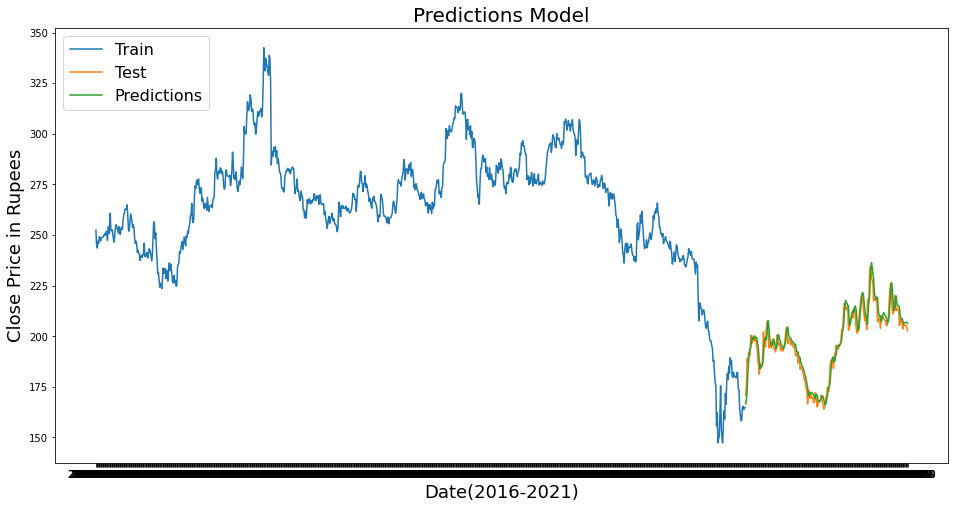

In [60]:
#Visualising the entire Data

plt.figure(figsize=(16,8))
plt.title("Predictions Model", fontsize = 20)
plt.xlabel("Date(2016-2021)" , fontsize=18)
plt.ylabel("Close Price in Rupees" , fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Test","Predictions"] ,loc="upper left",fontsize=16)
plt.show()

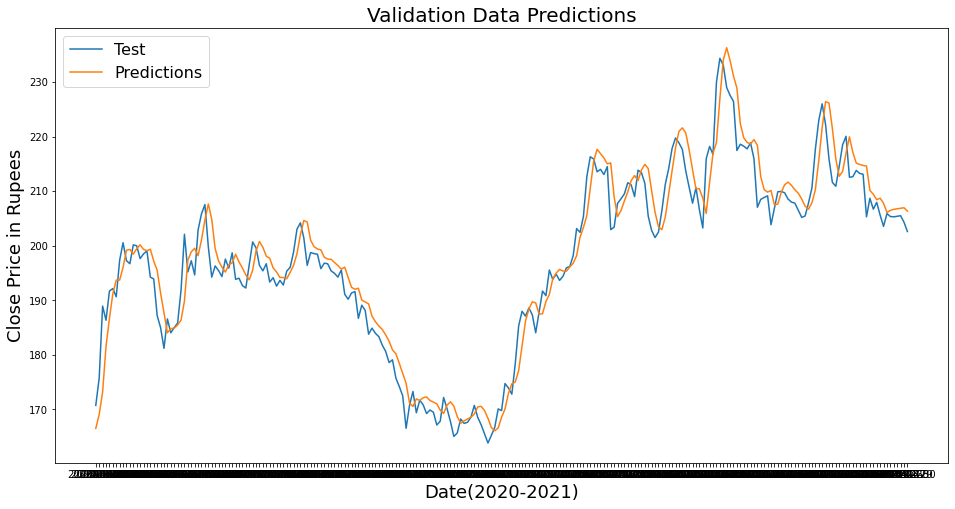

In [61]:
# Visualising the Validation Dataset Predictions 

plt.figure(figsize=(16,8))
plt.title("Validation Data Predictions", fontsize = 20)
plt.xlabel("Date(2020-2021)",fontsize=18)
plt.ylabel("Close Price in Rupees" , fontsize = 18)
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Test","Predictions"] ,loc="upper left",fontsize=16)
plt.show()

# Predicting Future Values

In [62]:
len(test_data)

339

In [63]:
x_input=test_data[239:].reshape(1,-1)
x_input.shape


(1, 100)

In [64]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input



[0.2507042253521127,
 0.26094750320102433,
 0.28629961587708064,
 0.2827144686299615,
 0.2978233034571064,
 0.3352112676056337,
 0.35364916773367494,
 0.35160051216389243,
 0.3395646606914212,
 0.34186939820742646,
 0.33700384122919347,
 0.3444302176696542,
 0.2852752880921895,
 0.28758002560819473,
 0.3098591549295774,
 0.3142125480153649,
 0.31882202304737517,
 0.32932138284250956,
 0.32727272727272727,
 0.3162612035851472,
 0.34110115236875804,
 0.3387964148527528,
 0.3288092189500639,
 0.2978233034571064,
 0.2845070422535211,
 0.27784891165172854,
 0.2829705505761845,
 0.30320102432778484,
 0.32778489116517295,
 0.34263764404609487,
 0.36158770806658136,
 0.37131882202304733,
 0.3667093469910371,
 0.3605633802816902,
 0.34033290653008963,
 0.32496798975672203,
 0.31011523687580034,
 0.3247119078104993,
 0.30396927016645325,
 0.2868117797695263,
 0.35185659411011516,
 0.3633802816901407,
 0.35595390524967996,
 0.42355953905249677,
 0.4460947503201024,
 0.43969270166453256,
 0.418693

In [65]:
#Prediction  for next 5 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<5):
    
    if(len(temp_input)>100):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
    
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
    
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.29567462]
101
1 day input [0.2609475  0.28629962 0.28271447 0.2978233  0.33521127 0.35364917
 0.35160051 0.33956466 0.3418694  0.33700384 0.34443022 0.28527529
 0.28758003 0.30985915 0.31421255 0.31882202 0.32932138 0.32727273
 0.3162612  0.34110115 0.33879641 0.32880922 0.2978233  0.28450704
 0.27784891 0.28297055 0.30320102 0.32778489 0.34263764 0.36158771
 0.37131882 0.36670935 0.36056338 0.34033291 0.32496799 0.31011524
 0.32471191 0.30396927 0.28681178 0.35185659 0.36338028 0.35595391
 0.42355954 0.44609475 0.4396927  0.41869398 0.41126761 0.4056338
 0.35953905 0.36542894 0.36363636 0.36107554 0.36670935 0.35185659
 0.30627401 0.31370038 0.31549296 0.31702945 0.28988476 0.30550576
 0.32087068 0.32112676 0.31984635 0.31395647 0.31113956 0.31011524
 0.30345711 0.29679898 0.29807939 0.31037132 0.32445583 0.36056338
 0.38770807 0.40332907 0.38386684 0.35185659 0.32957746 0.32599232
 0.3446863  0.36491677 0.37285531 0.33444302 0.33495519 0.34084507
 0.33802817 0.33725992 0.29731114 

In [66]:
lst_output = scaler.inverse_transform(lst_output)

lst_output

array([[204.98046996],
       [205.45719526],
       [206.21571842],
       [207.07327931],
       [207.99046651]])

# Actual Future Values

In [67]:
#Actual Future Stock Values

future_values_df = pd.read_csv("ITC.NS.csv")
fut_df = future_values_df[116:121]
fut_df

,Date,Open,High,Low,Close,Adj Close,Volume
116,2021-05-03,201.199997,201.850006,200.000000,200.949997,195.512527,20611626.0
117,2021-05-04,201.199997,202.350006,199.100006,199.600006,194.199066,18259282.0
118,2021-05-05,201.449997,202.000000,199.500000,201.399994,195.950348,13862655.0
119,2021-05-06,202.300003,205.949997,202.100006,202.750000,197.263824,14320889.0
120,2021-05-07,202.949997,206.449997,202.949997,205.350006,199.793472,19463495.0


In [68]:
fut_df.set_index(["Date"],inplace = True)
fut_data = fut_df.filter(["Close"])
fut_data

,Close
Date,
2021-05-03,200.949997
2021-05-04,199.600006
2021-05-05,201.399994
2021-05-06,202.750000
2021-05-07,205.350006


In [69]:
next_5_days = fut_data[:]

next_5_days

,Close
Date,
2021-05-03,200.949997
2021-05-04,199.600006
2021-05-05,201.399994
2021-05-06,202.750000
2021-05-07,205.350006


In [70]:
Error =abs(np.mean(((next_5_days - lst_output) / next_5_days))*100)

Error

Close    2.14989
dtype: float64

# Comparing Future Values

In [71]:
future = fut_data[:]

future["Prediction"] = lst_output

future

,Close,Prediction
Date,,
2021-05-03,200.949997,204.980470
2021-05-04,199.600006,205.457195
2021-05-05,201.399994,206.215718
2021-05-06,202.750000,207.073279
2021-05-07,205.350006,207.990467
